АЛГОРИТМ ВЫБОРА ТЕСТА ДЛЯ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ

Ранее мы рассмотрели факторы, влияющие на выбор статистического теста. Объединив эти факторы, мы получим следующий алгоритм выбора статистического теста для одного количественного признака (сохраните схему на свой компьютер, чтобы рассмотреть её детально):

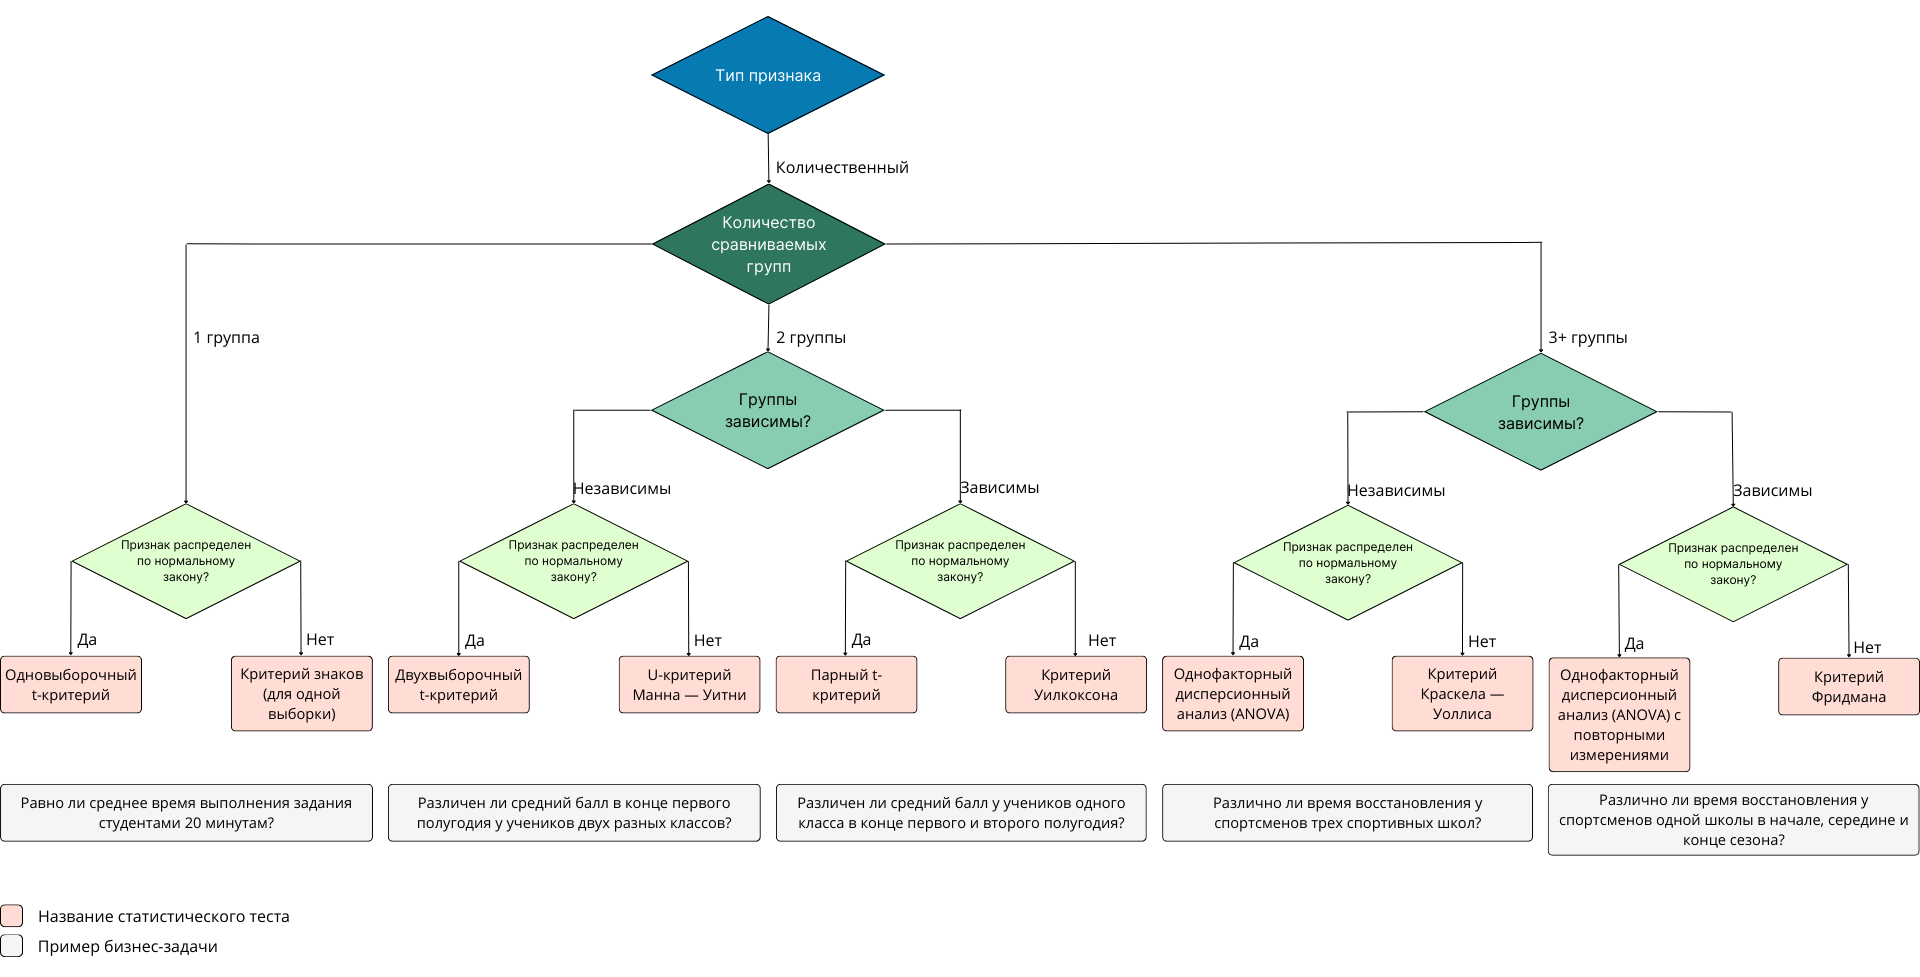

Например, в задаче, зависит ли средний чек покупки от пола покупателей, шаги по выбору теста будут такими:

- Какой тип у признака «средний чек»?
Количественный.
- Сколько сравниваемых групп?
Две (мужчины и женщины).
- Группы зависимы?
Нет, так как объекты в выборках не повторяются.
- Признак распределён по нормальному закону?
Если да, нужен двухвыборочный t-критерий.
Если нет, нужен U-критерий Манна — Уитни.

НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Многие процессы в природе следуют нормальному закону распределения: рост человека, вес при рождении, артериальное давление, размер ноги и др.

На курсе вы уже сталкивались с понятием нормального распределения и некоторыми теоремами и правилами, основанными на особенностях нормального распределения. В частности в модуле «Очистка данных» мы изучали метод z-отклонений (трёх сигм) и метод Тьюки для поиска выбросов — они работают только для нормально распределённых данных.

Нормальное распределение (распределение Гаусса) характеризуется двумя числами:

средним значением  (mu);
стандартным отклонением  (sigma).
Примеры нормальных распределений с разными  и :

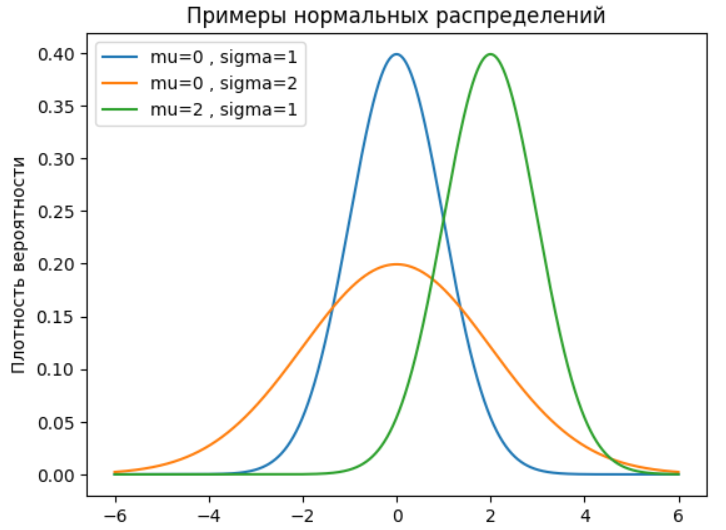

Как вы можете видеть, вне зависимости от значений параметра среднего и стандартного отклонения нормальное распределение визуально напоминает колокол (или шляпу).

Любое нормальное распределение обладает следующими свойствами:

- Один пик в центре и симметричные боковые стороны (одномодальное распределение).
- Среднее и медиана равны и расположены в центре распределения.
- Отклонение значений от среднего подчиняется правилу трёх сигм:
- 68 % значений находятся в пределах одного стандартного отклонения от среднего;
- 95 % значений — в пределах двух стандартных отклонений;
- 99.7% значений — в пределах трёх стандартных отклонений.

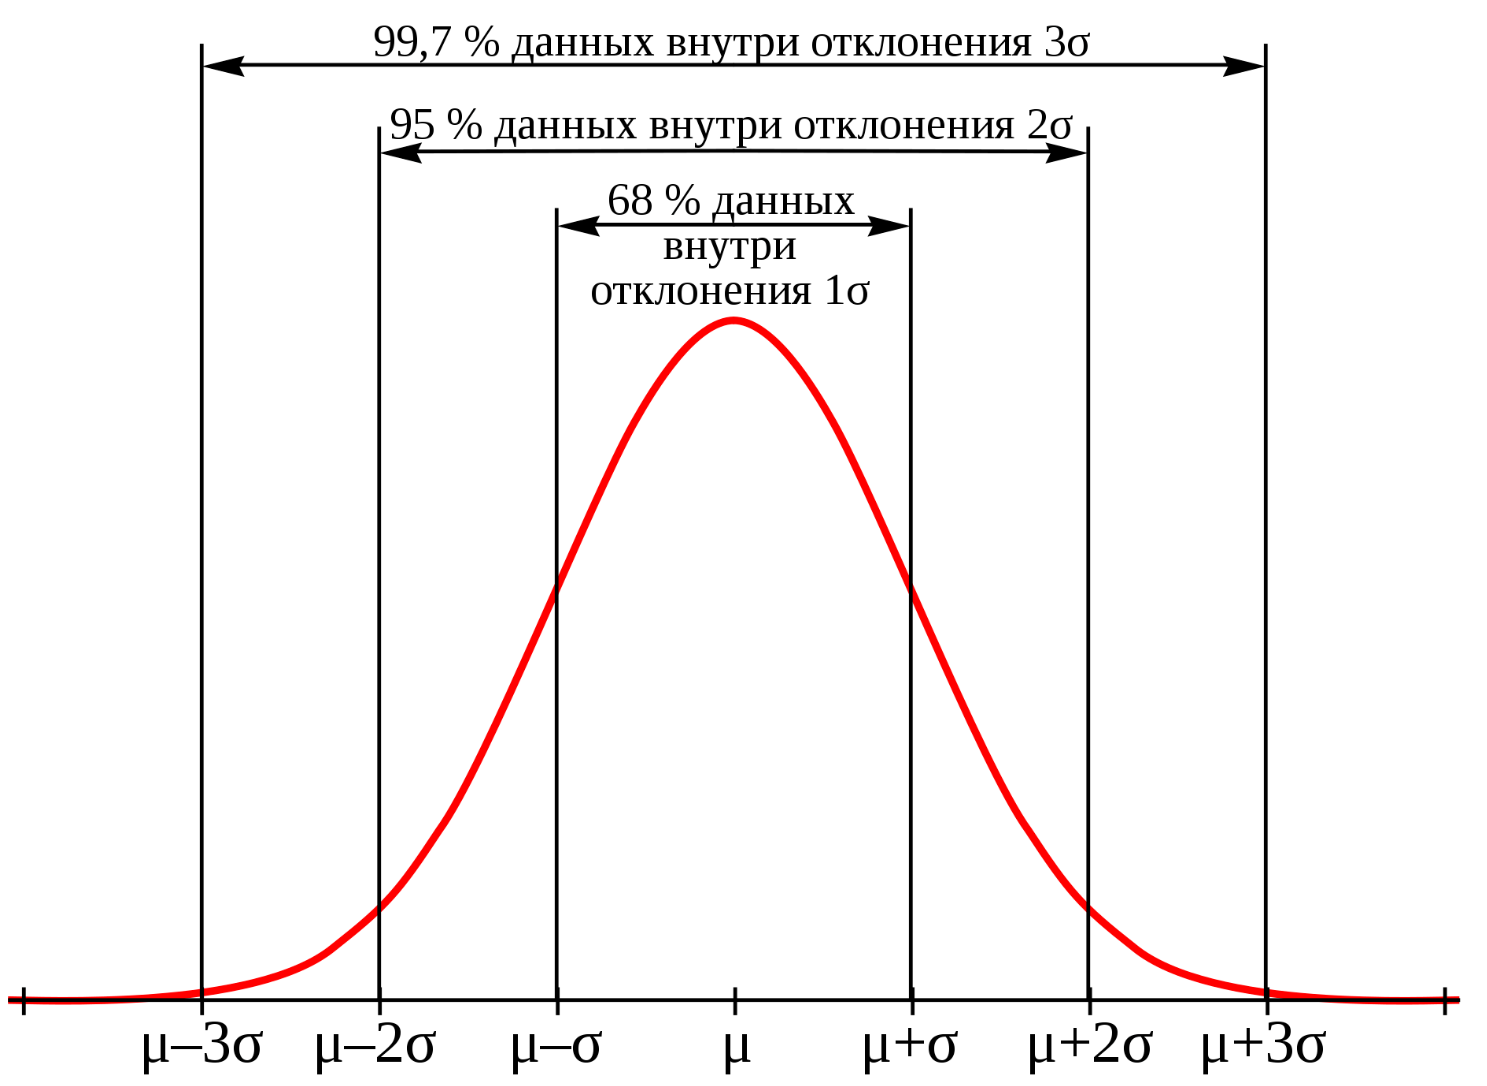

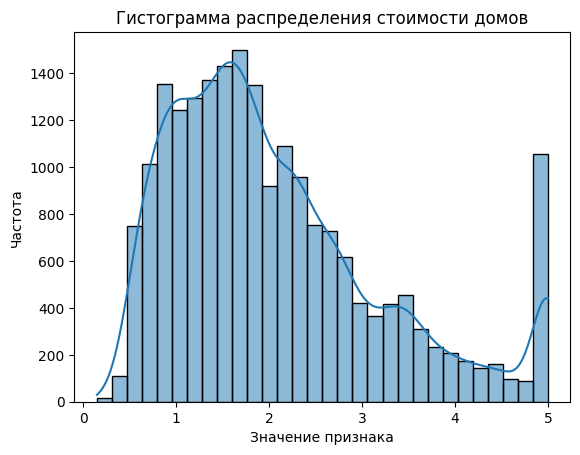

In [1]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

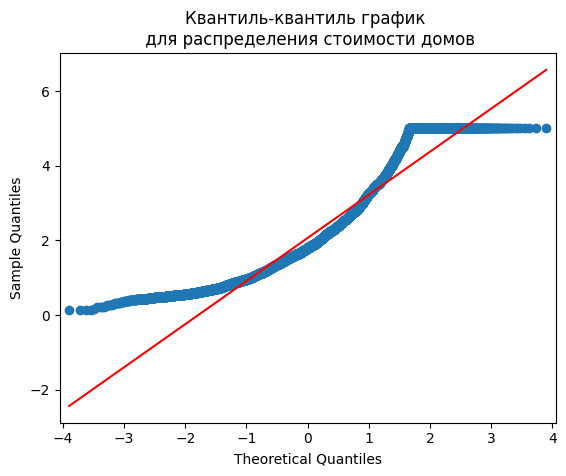

In [2]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

Существует несколько статистических методов, которые позволяют получить количественную оценку для проверки на нормальность. Мы рассмотрим наиболее часто встречающийся метод — тест Шапиро — Уилка.

Тест Шапиро — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до 5000 объектов.

Гипотезы в основе теста:

- Нулевая: данные распределены нормально.
- Альтернативная: данные не распределены нормально.
Детали расчёта p-value в тесте Шапиро — Уилка.

Если p-value теста больше уровня значимости , то мы считаем, что данные распределены нормально.

ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON

В Python тест Шапиро — Уилка реализован в функции shapiro() пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

Примечание. Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от p-value, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение p-value.

Рассмотрим пример использования этой функции.

Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:

In [7]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

# проводим тест Шапиро — Уилка
_,p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.414
Распределение нормальное
